In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import h5py
from xpcs_viewer import XpcsFile as xf
from xpcs_viewer.module import average_toolbox
from utils import (split, average_datasets, read_keys_from_files, read_temperature_from_files, outlier_removal,
read_keys_from_files_parallel)

In [2]:
data_dir = '/home/8ididata/2021-2/babnigg202107_2/cluster_results_QZ'

In [13]:
flist_B039 = glob.glob(os.path.join(data_dir, 'B039*hdf'))
flist_B039.sort()
print('total number of files B039 is ', len(flist_B039))

flist_B040 = glob.glob(os.path.join(data_dir, 'B040*hdf'))
flist_B040.sort()
print('total number of files B040 is ', len(flist_B040))

total number of files B039 is  2780
total number of files B040 is  2780


In [14]:
temperature_list_B039 = read_temperature_from_files(flist_B039)
        

In [5]:
# define parameters
num_sections = 12
flist_sections = split(flist, num_sections)
idx_sections = split(np.arange(len(flist)), num_sections)

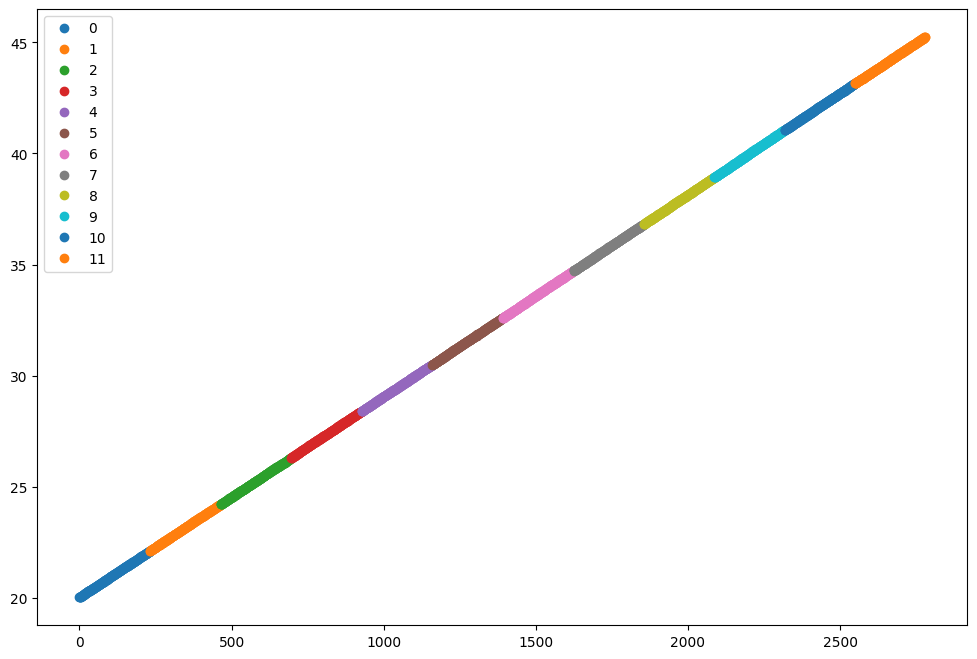

In [6]:
fig, ax = plt.subplots(1, 1)
for n, sub_list in enumerate(idx_sections):
    ax.plot(sub_list, temperature_list[sub_list], 'o', label=f'{n}')
plt.legend()

In [7]:
# get normalized data
# norm_prefix = '/home/8ididata/2022-1/babnigg202203/cluster_results'
# norm_data_list = glob.glob(os.path.join(norm_prefix, 'E0110_S3_4_Ramp_340C10p_att00_Rq*hdf'))
# print(len(norm_data_list))

In [8]:
data_dict_all = read_keys_from_files_parallel(flist_sections)

In [9]:
avg_all = []
for n, data_dict in enumerate(data_dict_all):
    mask = outlier_removal(data_dict, label=f'section_{n:02d}', percentile=5)
    avg_dict = average_datasets(data_dict=data_dict, mask=mask)
    avg_all.append(avg_dict)

label='section_00': remove 26 datasets out of 232
label='section_01': remove 27 datasets out of 232
label='section_02': remove 26 datasets out of 232
label='section_03': remove 28 datasets out of 232
label='section_04': remove 29 datasets out of 232
label='section_05': remove 26 datasets out of 232
label='section_06': remove 28 datasets out of 232
label='section_07': remove 25 datasets out of 232
label='section_08': remove 26 datasets out of 231
label='section_09': remove 26 datasets out of 231
label='section_10': remove 28 datasets out of 231
label='section_11': remove 28 datasets out of 231


In [10]:
print(avg_all[0]['g2'].shape)
print(avg_all[0]['saxs_1d'].shape)


(61, 27)
(270,)


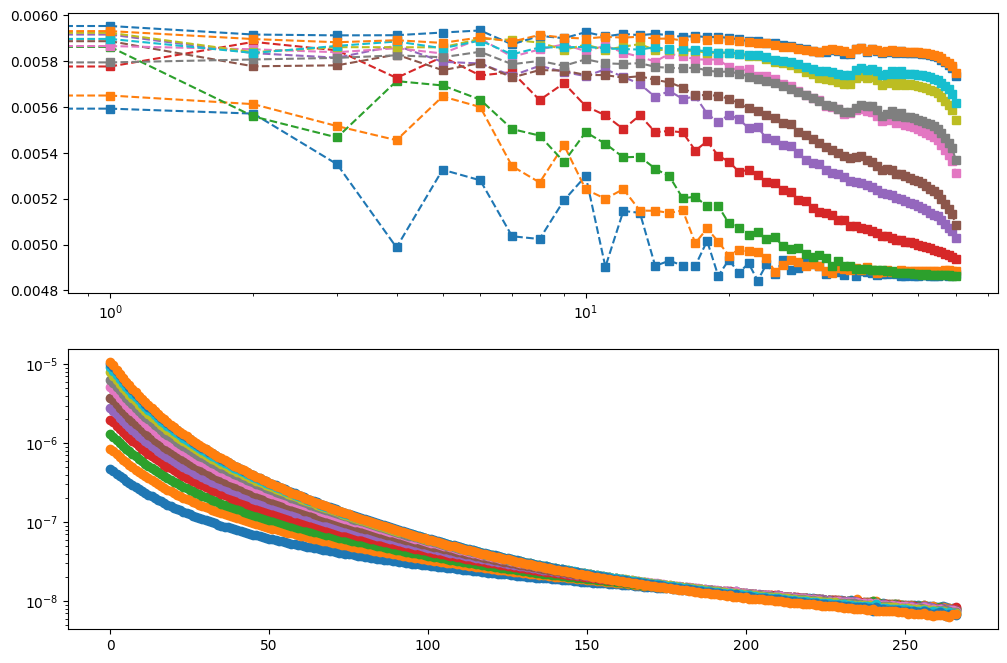

In [11]:
fig, ax = plt.subplots(2, 1)
for avg_dict in avg_all:
    ax[0].plot(avg_dict['g2'][:, 0], 's--')
    ax[0].set_xscale('log')
    
    ax[1].semilogy(avg_dict['saxs_1d'][:-3], 'o--')
    # ax[1].set_xscale('log')
# ax[2].semilogy(data_dict['saxs_1d'][0])